In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [22]:
df = pd.read_csv("solutions.csv")

In [23]:
df.head()

,Red Subset,Blue Subset,Sum,TimeFound
0,"(8381842, 2455118, 4890524, 8081143, 6192770, ...","(9469287, 6712289, 5992875, 1425045, 8022348, ...",74901981,1.727822e+09
1,"(8381842, 4890524, 8081143, 8224679, 8541011, ...","(9469287, 6712289, 4681945, 6483223, 1779814, ...",58551298,1.727824e+09
2,"(4681945, 8022348, 6483223, 1779814, 8546532, ...","(9469287, 1271334, 8381842, 2455118, 6192770, ...",58222826,1.727826e+09
3,"(1271334, 2455118, 5992875, 4890524, 6483223, ...","(9469287, 8381842, 4681945, 1779814, 4443234, ...",55666634,1.727827e+09
4,"(1271334, 6712289, 6483223, 8081143, 6192770, ...","(2455118, 5992875, 4890524, 4681945, 8022348, ...",60802152,1.727828e+09


In [24]:
df['Red Subset'] = df['Red Subset'].apply(ast.literal_eval)
df['Blue Subset'] = df['Blue Subset'].apply(ast.literal_eval)

# Calculate the sums of Red and Blue subsets
df['Red Sum'] = df['Red Subset'].apply(sum)
df['Blue Sum'] = df['Blue Subset'].apply(sum)

In [25]:
df.head()

,Red Subset,Blue Subset,Sum,TimeFound,Red Sum,Blue Sum
0,"(8381842, 2455118, 4890524, 8081143, 6192770, ...","(9469287, 6712289, 5992875, 1425045, 8022348, ...",74901981,1.727822e+09,74901981,74901981
1,"(8381842, 4890524, 8081143, 8224679, 8541011, ...","(9469287, 6712289, 4681945, 6483223, 1779814, ...",58551298,1.727824e+09,58551298,58551297
2,"(4681945, 8022348, 6483223, 1779814, 8546532, ...","(9469287, 1271334, 8381842, 2455118, 6192770, ...",58222826,1.727826e+09,58222826,58222825
3,"(1271334, 2455118, 5992875, 4890524, 6483223, ...","(9469287, 8381842, 4681945, 1779814, 4443234, ...",55666634,1.727827e+09,55666634,55666635
4,"(1271334, 6712289, 6483223, 8081143, 6192770, ...","(2455118, 5992875, 4890524, 4681945, 8022348, ...",60802152,1.727828e+09,60802152,60802152


In [27]:
# Check if Red Sum + Blue Sum equals the Sum column
df['Sum Check'] = df['Red Sum'] == df['Blue Sum']

In [30]:
# Print correct solutions
print(f"All sums match: {df['Sum Check'].all()}")
if not df['Sum Check'].all():
    matched = df[df['Sum Check']]
    print(f"Number of matched rows: {len(matched)}")
    print("First few matched rows:")
    print(matched[['Red Sum', 'Blue Sum', 'Sum']].head())

All sums match: False
Number of matched rows: 26
First few matched rows:
     Red Sum  Blue Sum       Sum
0   74901981  74901981  74901981
4   60802152  60802152  60802152
8   55056657  55056657  55056657
10  71798086  71798086  71798086
13  62315309  62315309  62315309


In [36]:
print(df["Red Subset"][0])
sum(df["Red Subset"][0])

(8381842, 2455118, 4890524, 8081143, 6192770, 1779814, 8546532, 8541011, 9356134, 3696206, 8534543, 4446344)


74901981

In [37]:
print(df["Blue Subset"][0])
sum(df["Blue Subset"][0])

(9469287, 6712289, 5992875, 1425045, 8022348, 8224679, 9222657, 9323386, 5363473, 1728483, 7451212, 1966247)


74901981

In [43]:
numbers = {
        9469287, 1271334, 6712289, 8381842, 2455118,
        5992875, 4890524, 1425045, 4681945, 8022348,
        6483223, 8081143, 6192770, 1779814, 4443234,
        8546532, 8224679, 9222657, 9323386, 5363473,
        8541011, 9356134, 7956588, 3696206, 8534543,
        4446344, 1728483, 7451212, 7496930, 1966247
    }
red_set = set(df["Red Subset"][0])
blue_set = set(df["Blue Subset"][0])
red_set.isdisjoint(blue_set)

True

In [44]:
red_set <= numbers

True

In [45]:
blue_set <= numbers

True

In [28]:
# Print incorrect solutions
print(f"All sums match: {df['Sum Check'].all()}")
if not df['Sum Check'].all():
    mismatched = df[~df['Sum Check']]
    print(f"Number of mismatched rows: {len(mismatched)}")
    print("First few mismatched rows:")
    print(mismatched[['Red Sum', 'Blue Sum', 'Sum']].head())

All sums match: False
Number of mismatched rows: 46
First few mismatched rows:
    Red Sum  Blue Sum       Sum
1  58551298  58551297  58551298
2  58222826  58222825  58222826
3  55666634  55666635  55666634
5  70669265  70669264  70669265
6  64562595  64562594  64562595


In [ ]:
start_time = datetime.min
df['TimeFound'] = df['TimeFound'].apply(lambda x: start_time + timedelta(seconds=x))

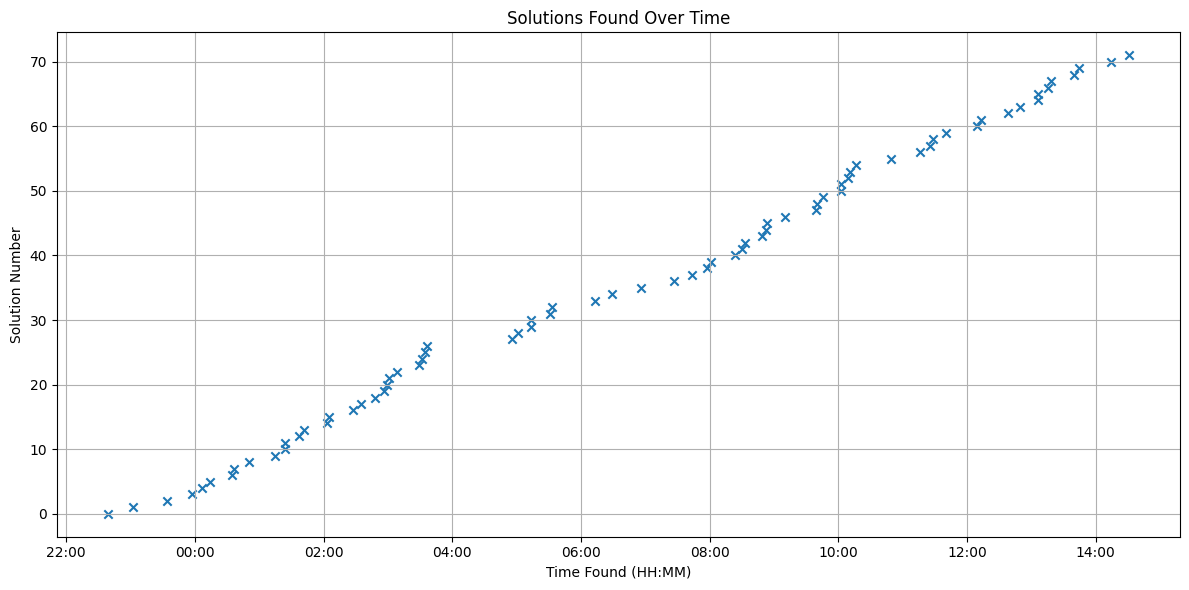

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(df['TimeFound'], df.index, marker='x')
plt.xlabel('Time Found (HH:MM)')
plt.ylabel('Solution Number')
plt.title('Solutions Found Over Time')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.show()